In [4]:
!pip install numpy pandas matplotlib scikit-learn seaborn


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('BNBUSD_1m_Binance.csv')
print(df.head())

             Open time  Open  High  Low  Close  Volume  \
0  2017-11-06 03:54:00   1.5  1.50  1.5   1.50   10.83   
1  2017-11-06 03:55:00   1.3  1.30  1.3   1.30    1.00   
2  2017-11-06 03:56:00   1.3  1.30  0.5   0.50   19.00   
3  2017-11-06 03:57:00   0.5  0.61  0.5   0.61  253.00   
4  2017-11-06 03:58:00   1.1  1.10  1.1   1.10   85.00   

                Close time  Quote asset volume  Number of trades  \
0  2017-11-06 03:54:59.999              16.245               2.0   
1  2017-11-06 03:55:59.999               1.300               1.0   
2  2017-11-06 03:56:59.999              24.356               6.0   
3  2017-11-06 03:57:59.999             151.660              17.0   
4  2017-11-06 03:58:59.999              93.500               1.0   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                        10.83                        16.245     0.0  
1                         0.00                         0.000     0.0  
2                         0.3

In [16]:
df = df.drop(columns=['Open time','Close time'])

In [17]:
print(df.head())

   Open  High  Low  Close  Volume  Quote asset volume  Number of trades  \
0   1.5  1.50  1.5   1.50   10.83              16.245               2.0   
1   1.3  1.30  1.3   1.30    1.00               1.300               1.0   
2   1.3  1.30  0.5   0.50   19.00              24.356               6.0   
3   0.5  0.61  0.5   0.61  253.00             151.660              17.0   
4   1.1  1.10  1.1   1.10   85.00              93.500               1.0   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                        10.83                        16.245     0.0  
1                         0.00                         0.000     0.0  
2                         0.33                         0.429     0.0  
3                         0.00                         0.000     0.0  
4                         0.00                         0.000     0.0  


In [18]:
df = df.drop(columns=['Ignore','Taker buy base asset volume','Taker buy quote asset volume'])

In [19]:
print(df)

         Open    High     Low   Close   Volume  Quote asset volume  \
0      1.5000  1.5000  1.5000  1.5000    10.83           16.245000   
1      1.3000  1.3000  1.3000  1.3000     1.00            1.300000   
2      1.3000  1.3000  0.5000  0.5000    19.00           24.356000   
3      0.5000  0.6100  0.5000  0.6100   253.00          151.660000   
4      1.1000  1.1000  1.1000  1.1000    85.00           93.500000   
...       ...     ...     ...     ...      ...                 ...   
72265  7.5461  7.5850  7.5461  7.5850  1499.06        11335.063746   
72266  7.5948  7.6025  7.5948  7.6025  1181.19         8976.975099   
72267  7.6174  7.6500  7.6174  7.6400  2185.35        16707.317274   
72268  7.6223  7.6231  7.6001  7.6001  2780.54        21141.863885   
72269  7.6018  7.6181  7.6001  7.6100   808.97            6.000000   

       Number of trades  
0                   2.0  
1                   1.0  
2                   6.0  
3                  17.0  
4                   1.0  
...

In [20]:
print(df.head())

   Open  High  Low  Close  Volume  Quote asset volume  Number of trades
0   1.5  1.50  1.5   1.50   10.83              16.245               2.0
1   1.3  1.30  1.3   1.30    1.00               1.300               1.0
2   1.3  1.30  0.5   0.50   19.00              24.356               6.0
3   0.5  0.61  0.5   0.61  253.00             151.660              17.0
4   1.1  1.10  1.1   1.10   85.00              93.500               1.0


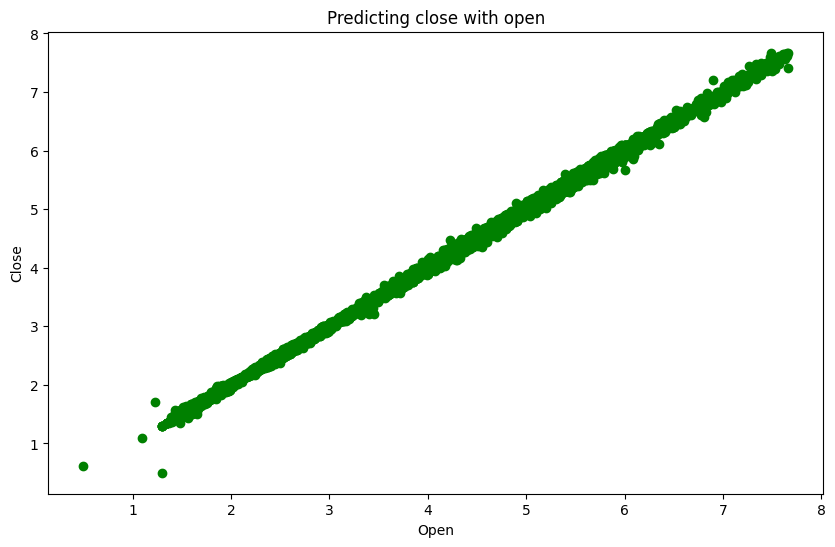

In [21]:
x = df[['Open']]
y = df[['Close']]
plt.figure(figsize=(10,6))
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Predicting close with open')
plt.scatter(x,y, marker='o', color='g')

In [22]:
df_sampled = df.sample(frac=0.1, random_state=42)


df_sampled.to_csv('reduced_file.csv', index=False)

In [23]:
df = pd.read_csv('reduced_file.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                7227 non-null   float64
 1   High                7227 non-null   float64
 2   Low                 7227 non-null   float64
 3   Close               7227 non-null   float64
 4   Volume              7227 non-null   float64
 5   Quote asset volume  7227 non-null   float64
 6   Number of trades    7227 non-null   float64
dtypes: float64(7)
memory usage: 395.4 KB
None


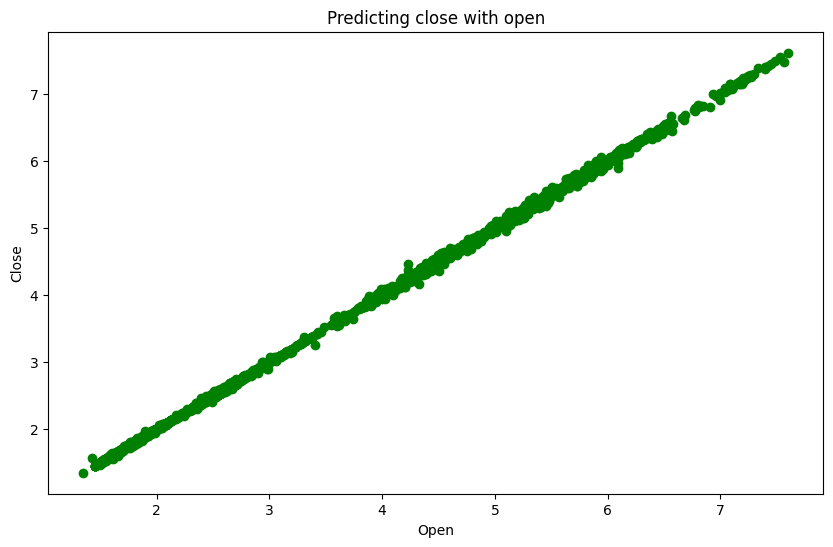

In [24]:
x = df[['Open']]
y = df[['Close']]
plt.figure(figsize=(10,6))
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Predicting close with open')
plt.scatter(x,y, marker='o', color='g')

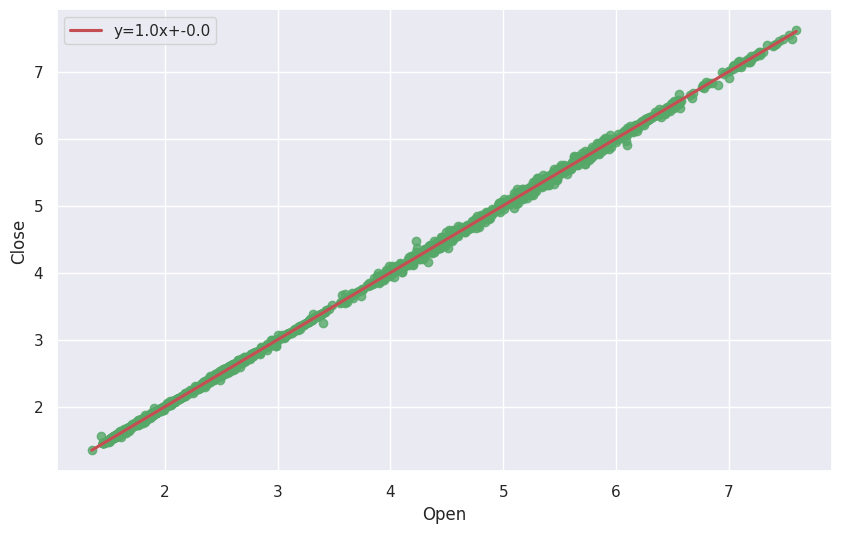

In [25]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Open'],df['Close'])

f = plt.figure(figsize=(10,6))
data = df[['Open','Close']]
ax = sns.regplot(x='Open', y='Close', data=data,
                 scatter_kws={"color": "g"},
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [26]:
print(slope, intercept)

1.0002391470511738 -0.0006031756353048756


In [27]:
print(std_err)

0.00014062961004918182


In [28]:
X = df['Open'].values
Y = df['Close'].values

In [29]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [30]:
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)
slope = numerator / denominator
intercept = mean_Y - slope * mean_X

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

Slope (m): 1.000239147051174
Intercept (b): -0.0006031756353053197


In [31]:
#multi dimensional linear regression where open and close are dependent variable and high is independent variable using numpy and pandas

In [32]:
X = df[['Open', 'Close']].values
Y = df['High'].values

In [33]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

print(f"Coefficients: {coefficients}")

intercept = coefficients[0]
slopes = coefficients[1:]

print(f"Intercept (b0): {intercept}")
print(f"Slopes (b1, b2, ...): {slopes}")

Y_pred = X @ coefficients

print("\nActual vs Predicted:")
print(pd.DataFrame({'Actual': Y, 'Predicted': Y_pred}))

Coefficients: [-0.0061874   0.54482844  0.45917181]
Intercept (b0): -0.006187397938141572
Slopes (b1, b2, ...): [0.54482844 0.45917181]

Actual vs Predicted:
      Actual  Predicted
0     2.4264   2.415535
1     1.9300   1.931533
2     2.5700   2.572350
3     2.4266   2.422497
4     2.4197   2.423192
...      ...        ...
7222  4.8398   4.836075
7223  1.9301   1.931633
7224  1.5998   1.600012
7225  1.6945   1.695091
7226  1.6550   1.655433

[7227 rows x 2 columns]


In [34]:
#linear regression using gradient descent

In [35]:

X = df[['Open']].values
Y = df['High'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))


Y = Y.reshape(-1, 1)

m = X_scaled.shape[0]
n = X_scaled.shape[1]


learning_rate = 0.001
iterations = 1000

theta = np.zeros((n, 1))

for _ in range(iterations):
    Y_pred = X_scaled @ theta

    error = Y_pred - Y

    error = error.reshape(-1, 1)

    gradient = (1 / m) * X_scaled.T @ error

    theta -= learning_rate * gradient

print("Coefficients:", theta)


Coefficients: [[1.70096704]
 [0.89389653]]


In [37]:
#ridge regression
X = df[['Open']].values
y = df['High'].values

X = np.hstack([np.ones((X.shape[0], 1)), X])
lambda_ = 0.1

m, n = X.shape
I = np.eye(n)
I[0, 0] = 0

beta = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

intercept = beta[0]
slopes = beta[1:]

print(f"Intercept (b0): {intercept}")
print(f"Slopes (b1, b2, ...): {slopes}")

y_pred = X @ beta

print("\nActual vs Predicted:")
print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}))


Intercept (b0): -0.006445536078600973
Slopes (b1, b2, ...): [1.00410305]

Actual vs Predicted:
      Actual  Predicted
0     2.4264   2.403402
1     1.9300   1.931473
2     2.5700   2.570886
3     2.4266   2.430111
4     2.4197   2.423183
...      ...        ...
7222  4.8398   4.853212
7223  1.9301   1.931574
7224  1.5998   1.599919
7225  1.6945   1.695007
7226  1.6550   1.655345

[7227 rows x 2 columns]


In [39]:
#lasso regression
X = df[['Open']].values
y = df['High'].values

X = np.hstack([np.ones((X.shape[0], 1)), X])

lambda_ = 0.1
num_iterations = 1000
learning_rate = 0.01

m, n = X.shape
coefficients = np.zeros(n)

for _ in range(num_iterations):
    for j in range(n):
        residual = y - (X @ coefficients - X[:, j] * coefficients[j])

        rho = np.sum(X[:, j] * residual)
        if j == 0:
            coefficients[j] = rho / np.sum(X[:, j] ** 2)
        else:
            if rho < -lambda_:
                coefficients[j] = (rho + lambda_) / np.sum(X[:, j] ** 2)
            elif rho > lambda_:
                coefficients[j] = (rho - lambda_) / np.sum(X[:, j] ** 2)
            else:
                coefficients[j] = 0

print(f"Coefficients: {coefficients}")


Coefficients: [-0.00644561  1.00410308]


In [40]:
#elastic net

In [41]:

# Extract features and target
X = df[['Open']].values  # Replace 'Open' with the desired feature column(s)
y = df['High'].values    # Replace 'High' with the target column

# Add an intercept column (bias term)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Elastic Net Parameters
lambda1 = 0.1  # L1 regularization strength
lambda2 = 0.1  # L2 regularization strength
num_iterations = 1000  # Number of iterations
learning_rate = 0.01  # Learning rate

# Initialize coefficients
m, n = X.shape
coefficients = np.zeros(n)

# Elastic Net via Gradient Descent
for _ in range(num_iterations):
    # Compute predictions
    predictions = X @ coefficients

    # Compute residuals
    residuals = predictions - y

    # Gradient computation
    gradient = (1 / m) * (X.T @ residuals) + lambda2 * coefficients

    # L1 component: soft-thresholding for L1 regularization
    for j in range(1, n):  # Skip the intercept
        if coefficients[j] > learning_rate * lambda1:
            gradient[j] -= learning_rate * lambda1
        elif coefficients[j] < -learning_rate * lambda1:
            gradient[j] += learning_rate * lambda1
        else:
            gradient[j] = 0

    # Update coefficients
    coefficients -= learning_rate * gradient

# Display the results
print(f"Coefficients: {coefficients}")


Coefficients: [2.4455135 0.       ]
